MNIST classification (drawn from sklearn example)
=====================================================
MWEM is not particularly well suited for image data (where there are tons of features with relatively large ranges) but it is still able to capture some important information about the underlying distributions if tuned correctly.

We use a feature included with MWEM that allows a column to be specified for a custom bin count, if we are capping every other bin count at a small value. In this case, we specify that the numerical column (784) has 10 possible values. We do this with the dict {'784': 10}.

Here we borrow from a scikit-learn example, and insert MWEM synthetic data into their training example/visualization, to understand the tradeoffs.

https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html#sphx-glr-download-auto-examples-linear-model-plot-sparse-logistic-regression-mnist-py


In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# pip install scikit-image
from skimage import data, color
from skimage.transform import rescale 

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
data = fetch_openml('mnist_784', version=1, return_X_y=False)

In [2]:
data_np = np.hstack((data.data,np.reshape(data.target.astype(int), (-1, 1))))

In [3]:
from opendp.smartnoise.synthesizers.mwem import MWEMSynthesizer

# Here we set max bin count to be 10, so that we retain the numeric labels
synth = MWEMSynthesizer(10.0, 40, 15, 10, split_factor=1, max_bin_count = 128, custom_bin_count={'784':10})
synth.fit(data_np)

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 255 in column: 13 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 217 in column: 14 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 237 in column: 34 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 255 in column: 35 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 36 exceeds max_bin_count, defaulting to: 128. Is this a continuo

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 142 in column: 86 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 140 in column: 88 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 89 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 90 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 91 exceeds max_bin_count, defaulting to: 128. Is this a continuo

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 132 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 133 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 134 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 135 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 136 exceeds max_bin_count, defaulting to: 128. Is this a con

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 193 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 255 in column: 194 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 254 in column: 195 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 192 in column: 197 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 198 exceeds max_bin_count, defaulting to: 128. Is this a con

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 238 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 239 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 240 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 241 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 242 exceeds max_bin_count, defaulting to: 128. Is this a con

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 281 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 282 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 283 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 284 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 285 exceeds max_bin_count, defaulting to: 128. Is this a con

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 325 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 326 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 327 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 328 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 329 exceeds max_bin_count, defaulting to: 128. Is this a con

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 372 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 373 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 374 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 375 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 376 exceeds max_bin_count, defaulting to: 128. Is this a con

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 255 in column: 418 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 227 in column: 421 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 255 in column: 422 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 423 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 424 exceeds max_bin_count, defaulting to: 128. Is this a con

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 467 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 468 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 469 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 470 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 471 exceeds max_bin_count, defaulting to: 128. Is this a con

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 512 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 513 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 514 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 515 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 516 exceeds max_bin_count, defaulting to: 128. Is this a con

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 553 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 554 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 555 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 556 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 557 exceeds max_bin_count, defaulting to: 128. Is this a con

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 600 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 601 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 602 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 603 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 604 exceeds max_bin_count, defaulting to: 128. Is this a con

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 650 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 651 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 652 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 653 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 654 exceeds max_bin_count, defaulting to: 128. Is this a con

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 255 in column: 703 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 704 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 705 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 706 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 707 exceeds max_bin_count, defaulting to: 128. Is this a con

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 255 in column: 764 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 765 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 766 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 767 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:307: Warning: Bin count 256 in column: 768 exceeds max_bin_count, defaulting to: 128. Is this a con

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:223: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1 Split: [26]
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:223: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1 Split: [27]
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:223: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1 Split: [28]
  warn

/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:223: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1 Split: [699]
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:223: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1 Split: [700]
  warnings.warn(
/Users/joshuaallen/Source/sdk/sdk/opendp/smartnoise/synthesizers/mwem.py:223: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1 Split: [701]
  w

In [4]:
sample_size = 2000
synthetic = synth.sample(sample_size)


Trained on Real Data
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84        40
         1.0       0.83      1.00      0.91        53
         2.0       0.73      0.50      0.59        32
         3.0       0.75      0.71      0.73        38
         4.0       0.67      0.83      0.74        42
         5.0       0.65      0.65      0.65        40
         6.0       0.85      0.80      0.82        35
         7.0       0.70      0.57      0.63        40
         8.0       0.66      0.63      0.64        30
         9.0       0.65      0.62      0.63        50

    accuracy                           0.73       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.73      0.73      0.73       400

Accuracy real: 0.7325

Trained on Synthetic Data
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        40
         1.0       0.00      0.00      0.00        53
       

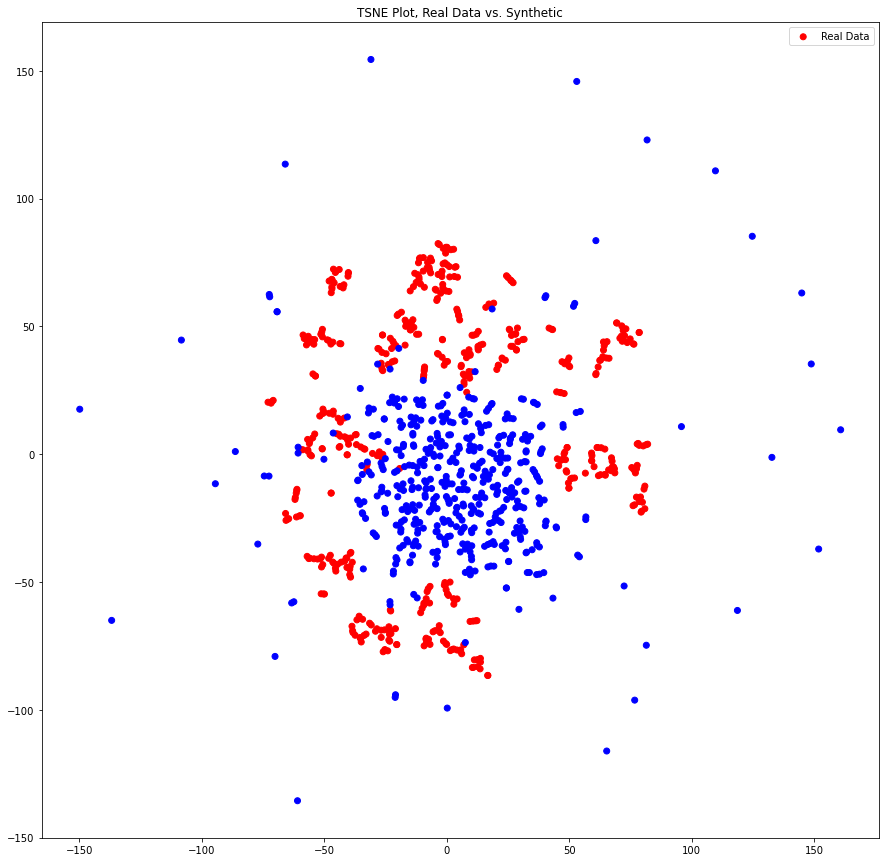

In [5]:
from sklearn.linear_model import RidgeClassifier

import utils

real = pd.DataFrame(data_np[:sample_size])

model_real, model_fake = utils.test_real_vs_synthetic_data(real, synthetic, RidgeClassifier, tsne=True)

Example run in 95.269 s


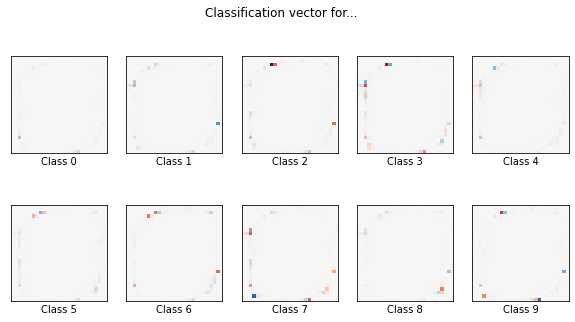

In [6]:
# Classification 
coef = model_real.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()

Example run in 95.536 s


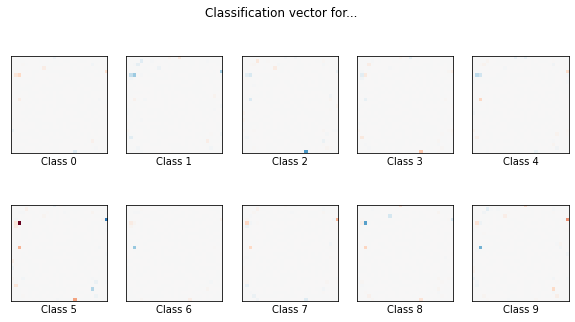

In [7]:
coef = model_fake.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()